In [13]:
import time

In [14]:
start = time.time()

In [15]:
import pandas as pd
import numpy as np
import scipy.stats
from sklearn import ensemble
import matplotlib.pyplot as plt
import os

from functions.pipeline import *

In [16]:
SEED = 123
np.random.seed(SEED)

In [17]:
p = os.path.dirname(os.path.realpath(__name__))
path = f"{p}/data/data.csv"
df = pd.read_csv(path)
matrix, target = Gx.processing(df)

In [18]:
df.head(2)

,subject,condition,replication,leg,joint,time,angle
0,1,1,1,1,1,0,4.682881
1,1,1,1,1,1,1,5.073127


In [19]:
matrix.head(2)

left_ankle  left_knee   left_hip  right_ankle  right_knee  \
trial time                                                              
1     0       4.682881   3.693683  16.607868     5.015829    2.244425   
      1       5.073127   4.258876  16.851029     5.291201    3.381678   

            right_hip  
trial time             
1     0      18.94829  
      1      19.26530

In [20]:
target.head(2)

1    1
2    1
Name: condition, dtype: int64

In [ ]:
plt.pie(df['condition'].value_counts(), autopct='%1.1f%%', labels = ["1 : No Brace",'2 : Knee Brace','3 : Ankle Brace'], wedgeprops=dict(edgecolor='black'))
plt.savefig('Condition_ValCount_PieChart.png', bbox_inches='tight')

plt.show()

In [21]:
"""# knee brace
subject_no = 2
condition_no = 1
rep_no = 3
idx = (N_REPS * N_CONDITIONS) * (subject_no - 1) + N_REPS * (condition_no - 1) + (rep_no % N_REPS)
matrix.loc[idx, :].plot()"""

'# knee brace\nsubject_no = 2\ncondition_no = 1\nrep_no = 3\nidx = (N_REPS * N_CONDITIONS) * (subject_no - 1) + N_REPS * (condition_no - 1) + (rep_no % N_REPS)\nmatrix.loc[idx, :].plot()'

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'matrix' is your DataFrame containing the angle data
fig, ax = plt.subplots(figsize=(18, 15))

# Create a figure and axis
#fig, ax = plt.subplots()

a = matrix['left_ankle'].unique()
b = matrix['right_ankle'].unique()
c = matrix['left_knee'].unique()
d = matrix['right_knee'].unique()
e = matrix['left_hip'].unique()
f = matrix['right_hip'].unique()

data = [a, b, c, d, e, f]
colors = ["Orange", 'Blue', "Red", "Green", "Yellow", "Purple"]

plots = ax.violinplot(data, vert=False, showmedians=True, showextrema=True, widths=1)

# Set the color of the violin patches
for pc, color in zip(plots['bodies'], colors):
    pc.set_facecolor(color)

# Set the color of the median lines
plots['cmedians'].set_color('black')

    
ax.yaxis.grid(True)

x_ticklabels = ['Left Ankle', 'Right Ankle', 'Left Knee', 'Right Knee', 'Left Hip', 'Right Hip']
ax.set_yticks([1, 2, 3, 4, 5, 6])
ax.set_yticklabels(x_ticklabels)

ax.set_xlabel("Angles(degrees)", fontsize=37)
ax.set_ylabel('Joints', fontsize=37)

ax.yaxis.grid(True)


ax.tick_params(axis='both', which='major', labelsize=30)

plt.title("Distribution of Angle Measurements for different Joints", fontsize=37)
plt.savefig('Angle_Distr_ViolinPlot.png',dpi = 700, bbox_inches='tight')

plt.show()

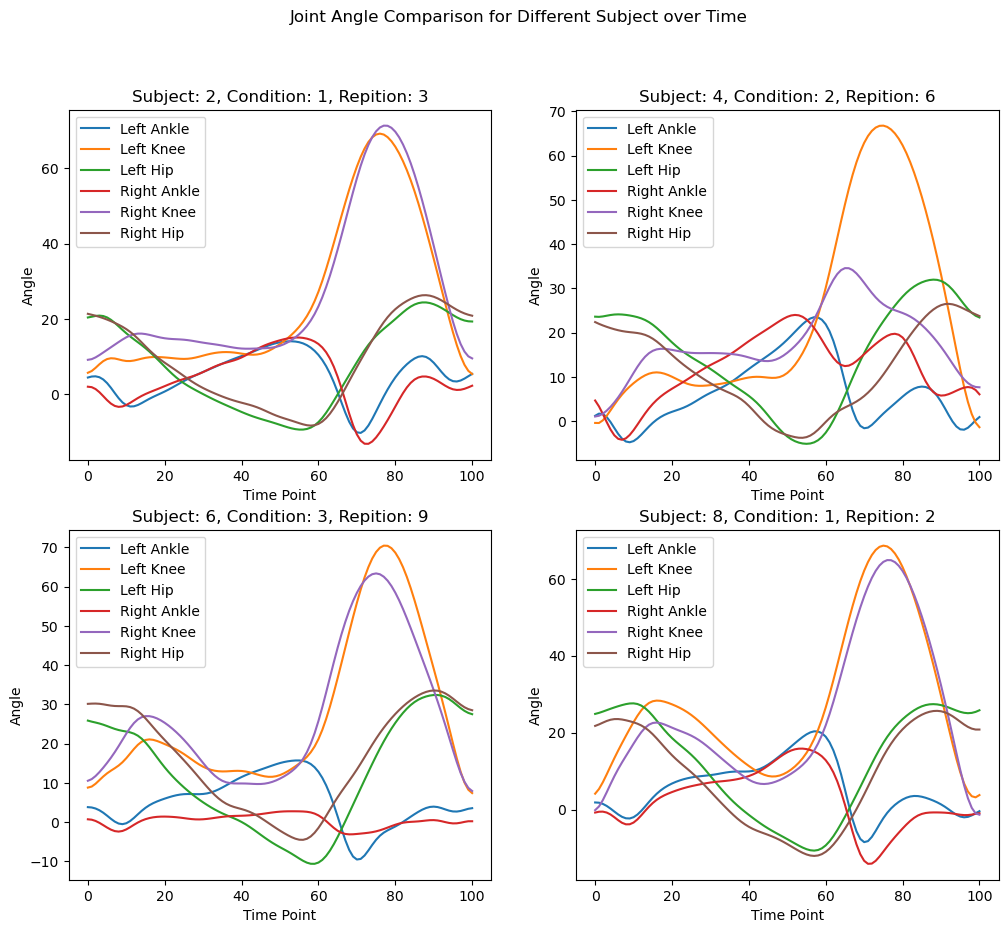

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))


subject_no = 2
condition_no = 1
rep_no = 3
idx = (N_REPS * N_CONDITIONS) * (subject_no - 1) + N_REPS * (condition_no - 1) + (rep_no % N_REPS)
axs[0,0].plot(matrix.loc[idx, :],label = ['Left Ankle', 'Left Knee', 'Left Hip', 'Right Ankle', 'Right Knee', 'Right Hip'])
axs[0,0].set_title("Subject: {}, Condition: {}, Repition: {}".format(subject_no,condition_no,rep_no))

subject_no = 4
condition_no = 2
rep_no = 6
idx = (N_REPS * N_CONDITIONS) * (subject_no - 1) + N_REPS * (condition_no - 1) + (rep_no % N_REPS)
axs[0,1].plot(matrix.loc[idx, :],label = ['Left Ankle', 'Left Knee', 'Left Hip', 'Right Ankle', 'Right Knee', 'Right Hip'])
axs[0,1].set_title("Subject: {}, Condition: {}, Repition: {}".format(subject_no,condition_no,rep_no))


subject_no = 6
condition_no = 3
rep_no = 9
idx = (N_REPS * N_CONDITIONS) * (subject_no - 1) + N_REPS * (condition_no - 1) + (rep_no % N_REPS)
axs[1,0].plot(matrix.loc[idx, :],label = ['Left Ankle', 'Left Knee', 'Left Hip', 'Right Ankle', 'Right Knee', 'Right Hip'])
axs[1,0].set_title("Subject: {}, Condition: {}, Repition: {}".format(subject_no,condition_no,rep_no))

subject_no = 8
condition_no = 1
rep_no = 2
idx = (N_REPS * N_CONDITIONS) * (subject_no - 1) + N_REPS * (condition_no - 1) + (rep_no % N_REPS)
axs[1,1].plot(matrix.loc[idx, :],label = ['Left Ankle', 'Left Knee', 'Left Hip', 'Right Ankle', 'Right Knee', 'Right Hip'])
axs[1,1].set_title("Subject: {}, Condition: {}, Repition: {}".format(subject_no,condition_no,rep_no))

for ax_row in axs:
    for ax in ax_row:
        ax.set_xlabel('Time Point')
        ax.set_ylabel('Angle')
        

# Add legend to each subplot
for ax_row in axs:
    for ax in ax_row:
        ax.legend()


#plt.suptitle("Joint Angle Comparison for Different Subject over Time")        
plt.savefig('JointAngles_TimePoints.png', bbox_inches='tight')


# Feature Extraction

In [23]:
n_splits = 4
feature_sets = Gx.create_feature_sets(matrix, n_splits)
feature_set_names = ["base"] + [f"covs_split_{i}" for i in range(1, n_splits + 1)]
feature_set_dict = dict(zip(feature_set_names, feature_sets))

In [24]:
feature_set_dict["base"].head(2)

,left_ankle_mean,left_knee_mean,left_hip_mean,right_ankle_mean,right_knee_mean,right_hip_mean
trial,,,,,,
1,7.850984,21.860145,4.597241,7.061943,22.231482,5.737394
2,7.003371,22.046200,2.934972,7.019926,24.393793,7.028008


In [25]:
feature_set_dict["covs_split_1"].head(2)

,ankle_1_1,knee_1_1
trial,,
1,19.994342,332.00362
2,21.547690,370.86164


# Testing Model

In [26]:
feature_valid_errors = []
optimals = []
all_errors_list = []

for i, features in enumerate(feature_sets):
    print(f"\n\nSet {i+1}:\n")
    all_errors, optimal = Gx.grid_search(features, target)

    optimals.append(optimal)
    all_errors_list.append(all_errors)
    feature_valid_errors.append(optimal.mean_error)



Set 1:

4% complete.
8% complete.
12% complete.
16% complete.
20% complete.
24% complete.
28% complete.
32% complete.
36% complete.
40% complete.
44% complete.
48% complete.
52% complete.
56% complete.
60% complete.
64% complete.
68% complete.
72% complete.
76% complete.
80% complete.
84% complete.
88% complete.
92% complete.
96% complete.
100% complete.


Set 2:

4% complete.
8% complete.
12% complete.
16% complete.
20% complete.
24% complete.
28% complete.
32% complete.
36% complete.
40% complete.
44% complete.
48% complete.
52% complete.
56% complete.
60% complete.
64% complete.
68% complete.
72% complete.
76% complete.
80% complete.
84% complete.
88% complete.
92% complete.
96% complete.
100% complete.


Set 3:

4% complete.
8% complete.
12% complete.
16% complete.
20% complete.
24% complete.
28% complete.
32% complete.
36% complete.
40% complete.
44% complete.
48% complete.
52% complete.
56% complete.
60% complete.
64% complete.
68% complete.
72% complete.
76% complete.
80% comp

In [27]:
hyperparameter_choices = dict(zip(feature_set_names, optimals))

valid_errors = dict(zip(feature_set_names, feature_valid_errors))
all_errors_dict = dict(zip(feature_set_names, all_errors_list))
lowest_error_idx = pd.Series(valid_errors).argmin()
optimal_feature_set_name = list(valid_errors)[lowest_error_idx]

In [28]:
hyperparameter_choices["base"].mean_error

0.4912697816494717

In [29]:
valid_errors

{'base': 0.4912697816494717,
 'covs_split_1': 0.07546467179169149,
 'covs_split_2': 0.1678558810691431,
 'covs_split_3': 0.2354498741919326,
 'covs_split_4': 0.16310619974862853}

In [30]:
optimal_feature_set_name

'covs_split_1'

In [31]:
print("Hyperparameter grid search for best set of features:")
all_errors_dict[optimal_feature_set_name]



Hyperparameter grid search for best set of features:


,max_depth,min_impurity_decrease,mean_error,stdev_error
0,3.0,0.000,0.075465,0.134780
1,3.0,0.025,0.087749,0.126607
2,3.0,0.050,0.096026,0.127426
3,3.0,0.075,0.100162,0.124529
4,3.0,0.100,0.105766,0.126228
5,5.0,0.000,0.075465,0.134780
6,5.0,0.025,0.087749,0.126607
7,5.0,0.050,0.096026,0.127426
8,5.0,0.075,0.100162,0.124529
9,5.0,0.100,0.105766,0.126228


In [32]:
hyperparameter_choices

{'base': max_depth                3.000000
 min_impurity_decrease    0.100000
 mean_error               0.491270
 stdev_error              0.802056
 Name: 4, dtype: float64,
 'covs_split_1': max_depth                5.000000
 min_impurity_decrease    0.000000
 mean_error               0.075465
 stdev_error              0.134780
 Name: 5, dtype: float64,
 'covs_split_2': max_depth                9.000000
 min_impurity_decrease    0.025000
 mean_error               0.167856
 stdev_error              0.163658
 Name: 16, dtype: float64,
 'covs_split_3': max_depth                5.00000
 min_impurity_decrease    0.02500
 mean_error               0.23545
 stdev_error              0.22128
 Name: 6, dtype: float64,
 'covs_split_4': max_depth                3.000000
 min_impurity_decrease    0.025000
 mean_error               0.163106
 stdev_error              0.287738
 Name: 1, dtype: float64}

In [33]:
hyperparameter_choices.keys()


dict_keys(['base', 'covs_split_1', 'covs_split_2', 'covs_split_3', 'covs_split_4'])

In [34]:
hyperparameter_choices.values()
#hyperparameter_choices.values()
#plt.bar(hyperparameter_choices.keys(),hyperparameter_choices['min_impurity_decrease'])

dict_values([max_depth                3.000000
min_impurity_decrease    0.100000
mean_error               0.491270
stdev_error              0.802056
Name: 4, dtype: float64, max_depth                5.000000
min_impurity_decrease    0.000000
mean_error               0.075465
stdev_error              0.134780
Name: 5, dtype: float64, max_depth                9.000000
min_impurity_decrease    0.025000
mean_error               0.167856
stdev_error              0.163658
Name: 16, dtype: float64, max_depth                5.00000
min_impurity_decrease    0.02500
mean_error               0.23545
stdev_error              0.22128
Name: 6, dtype: float64, max_depth                3.000000
min_impurity_decrease    0.025000
mean_error               0.163106
stdev_error              0.287738
Name: 1, dtype: float64])

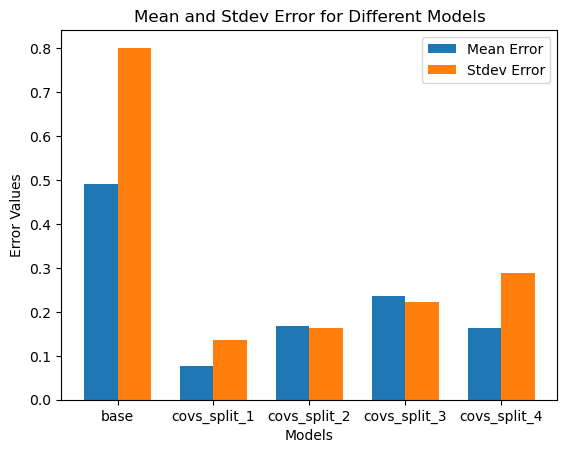

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Your dictionary keys and values
keys = ['base', 'covs_split_1', 'covs_split_2', 'covs_split_3', 'covs_split_4']
values = [
    pd.Series({'max_depth': 3.0, 'min_impurity_decrease': 0.1, 'mean_error': 0.491270, 'stdev_error': 0.802056}),
    pd.Series({'max_depth': 5.0, 'min_impurity_decrease': 0.0, 'mean_error': 0.075465, 'stdev_error': 0.134780}),
    pd.Series({'max_depth': 9.0, 'min_impurity_decrease': 0.025, 'mean_error': 0.167856, 'stdev_error': 0.163658}),
    pd.Series({'max_depth': 5.0, 'min_impurity_decrease': 0.025, 'mean_error': 0.23545, 'stdev_error': 0.22128}),
    pd.Series({'max_depth': 3.0, 'min_impurity_decrease': 0.025, 'mean_error': 0.163106, 'stdev_error': 0.287738})
]

# Extract 'mean_error' and 'stdev_error' values
mean_errors = [series['mean_error'] for series in values]
stdev_errors = [series['stdev_error'] for series in values]

# Set up the positions for the bars
bar_width = 0.35
index = range(len(keys))
bar1 = [i - bar_width/2 for i in index]
bar2 = [i + bar_width/2 for i in index]

# Create multi-bar chart
plt.bar(bar1, mean_errors, width=bar_width, label='Mean Error')
plt.bar(bar2, stdev_errors, width=bar_width, label='Stdev Error')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Error Values')
plt.title('Mean and Stdev Error for Different Models')
plt.xticks(index, keys)
plt.legend()

plt.savefig('Cluster_Comparison.png',dpi = 700, bbox_inches='tight')

# Show the bar chart
plt.show()



In [37]:
z = scipy.stats.norm.ppf(.95)
optimal_hps = hyperparameter_choices[optimal_feature_set_name]

lower_conf = optimal_hps.mean_error - z * optimal_hps.stdev_error 
lower_conf = max(0, lower_conf)
upper_conf = optimal_hps.mean_error + z * optimal_hps.stdev_error 
conf_interval = (lower_conf, upper_conf)
conf_interval

(0, 0.2971572652265777)

In [38]:
optimal_hps

max_depth                5.000000
min_impurity_decrease    0.000000
mean_error               0.075465
stdev_error              0.134780
Name: 5, dtype: float64

In [39]:
optimal_dict = dict(zip(feature_set_dict.keys(), optimals))

In [40]:
optimal_dict['base']

max_depth                3.000000
min_impurity_decrease    0.100000
mean_error               0.491270
stdev_error              0.802056
Name: 4, dtype: float64

In [41]:
hyperparams = ["max_depth", "min_impurity_decrease"]
indexed_errors = all_errors.set_index(hyperparams)
indexed_errors.mean_error



max_depth  min_impurity_decrease
3.0        0.000                    0.531710
           0.025                    0.163106
           0.050                    0.164519
           0.075                    0.166126
           0.100                    0.171454
5.0        0.000                    0.491807
           0.025                    0.172765
           0.050                    0.174870
           0.075                    0.173568
           0.100                    0.174962
7.0        0.000                    0.504289
           0.025                    0.180337
           0.050                    0.180210
           0.075                    0.181611
           0.100                    0.180664
9.0        0.000                    0.504284
           0.025                    0.180129
           0.050                    0.179981
           0.075                    0.180125
           0.100                    0.181032
11.0       0.000                    0.504283
           0.025      

# Test Data

In [44]:
features = feature_set_dict[optimal_feature_set_name]
X_train, y_train, X_test, y_test = Gx.train_test_split(features, target)

model = ensemble.GradientBoostingClassifier(
    n_estimators=N_ESTIMATORS, 
    max_depth=int(optimal_hps.loc["max_depth"]), 
    min_impurity_decrease=float(optimal_hps.loc["min_impurity_decrease"]), 
    loss="log_loss"
    )

error_test, y_test_probs = Gx.run_model(X_train, y_train, X_test, y_test, model)

In [45]:
error_test # essentially zero!

2.0727905560060287e-08

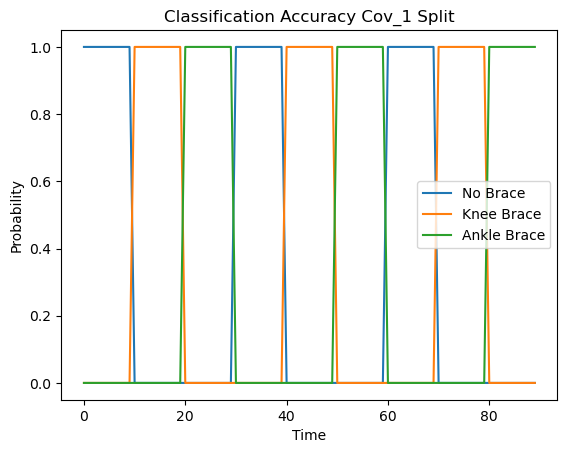

In [46]:
#pd.DataFrame(y_test_probs).plot()
ax = pd.DataFrame(y_test_probs).plot()

# Set the label for the y-axis
ax.set_ylabel('Probability')
labels = ['No Brace','Knee Brace',"Ankle Brace"]
# Set other labels and title if needed
ax.set_xlabel('Time')
ax.legend(labels,loc = 'right')
plt.title('Classification Accuracy Cov_1 Split')
plt.savefig('Correct_Classification.png',bbox_inches='tight')


In [ ]:
pd.DataFrame(error_test).plot()


In [ ]:
# ten subjects
# ten replications
# three conditions

# 6 measurements for each one (two legs, three joints)
# time series are 101 points long
# so the data is actually (300 x 101 x 6), so we should represent it as such.

# train-test split: 
# 7 subjects for train: should do leave-one-out validation (as in 1 subject each time)
# 3 subjects for test: leave three subjects for test

In [ ]:
# to do:

# create cov features by splitting the data (e.g. first half / second half)

In [1]:
end = time.time()

time_taken = end - start
mins = int(time_taken // 60)
seconds = int(time_taken % 60)
print(f"Time taken: {mins}m{seconds}s")

NameError: name 'time' is not defined